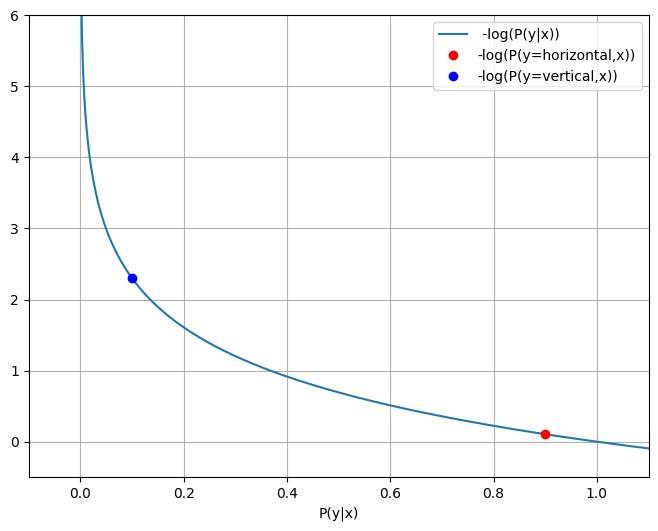

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(np.linspace(0.001, 1.1, 500), -np.log(x), label=' -log(P(y|x))')
plt.ylim(-0.5, 6),plt.xlim(-0.1, 1.1),plt.xlabel('P(y|x)')
plt.legend(),plt.grid(True)

plt.plot(0.9, -np.log(0.9), 'ro', label='-log(P(y=horizontal,x))')
plt.plot(0.1, -np.log(0.1), 'bo', label='-log(P(y=vertical,x))')
plt.legend(),plt.show();

In [ ]:
# NB 03

## Do not worry about this cell, just move the sliders.
import scipy.signal
from skimage.measure import block_reduce  # For max pooling
import ipywidgets as widgets

# Kernel from model
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.imshow(np.random.rand(25).reshape(5, 5),"gray") ,plt.title('Randomly initalized weights')
plt.subplot(1, 2, 2)
conv_filter=np.squeeze(model.get_weights()[0], axis=2)
plt.imshow(conv_filter[:,:,0],"gray"),plt.title('Learned Kernel (weights) , by model'),plt.show();
print("\n---------Move the sliders to inspect different vertical and horizontal images from the valset and their predictions:------------------\n")

def scale_convolution_map(conv_map, min_val=-3, max_val=3):
    clipped_conv_map = np.clip(conv_map, min_val, max_val)
    scaled_conv_map = (clipped_conv_map - min_val) / (max_val - min_val)
    return scaled_conv_map

def plot_conv(img):
  convolved_image = scipy.signal.convolve2d(img.squeeze(), conv_filter.squeeze(), mode='same')
  scaled_conv_image = scale_convolution_map(convolved_image + model.get_weights()[1])
  max_pooled_image = block_reduce(convolved_image + model.get_weights()[1], block_size=(50, 50), func=np.max)
  scaled_max_pooled_image = scale_convolution_map(max_pooled_image)
  
  plt.figure(figsize=(20, 5))  # Adjust the figure size as needed
  plt.subplot(1, 6, 1)
  plt.imshow(img, "gray", vmin=0, vmax=1),plt.title('Original Image')
  plt.subplot(1, 6, 2)
  plt.imshow(scaled_conv_image, "gray", vmin=0, vmax=1),plt.title('Convolved Image')
  plt.subplot(1, 6, 3),plt.imshow(scaled_max_pooled_image, "gray", vmin=0, vmax=1)
  plt.title(f'Max Pooled = {max_pooled_image[0][0]:.2f}'),plt.xticks([]), plt.yticks([])
  plt.subplot(1, 6, 4),plt.axis('off')
  pred = model.predict(img.reshape(1, 50, 50, 1), verbose=0)
  text_info = f'''
  P(y=vertical|x): {pred[0][0]:.4f}
  P(y=horizontal|x): {pred[0][1]:.4f}
                  
                  
   -log(P(y=vertical|x)): {-np.log(pred[0][0]):.4f}
   -log(P(y=horizontal|x)): {-np.log(pred[0][1]):.4f}
    '''
  plt.text(0, 0.5, text_info, ha='left', va='center')
  plt.subplot(1, 6, 5)
  x_values = np.linspace(0.001, 1.1, 500)
  plt.plot(x_values, -np.log(x_values), label='-log(P(y|x))')
  plt.ylim(-0.5, 6),plt.xlim(-0.1, 1.1),plt.xlabel('P(y|x)')
  plt.plot(pred[0][0], -np.log(pred[0][0]), 'bo', label='-log(P(y=vertical|x))')
  plt.plot(pred[0][1], -np.log(pred[0][1]), 'ro', label='-log(P(y=horizontal|x))')
  plt.legend(),plt.grid(True), plt.tight_layout(),plt.show();

def inspect_preds(horizontal,vertical):
  plot_conv(X_val[horizontal,:,:,0])
  plot_conv(X_val[vertical,:,:,0])

horizontal_slider = widgets.IntSlider(min=0, max=num_images_val//2-1, step=1, value=0, description='vertical ')
vertical_slider = widgets.IntSlider(min=num_images_val//2, max=num_images_val-1, step=1, value=0, description='horizontal')
widgets.interact(inspect_preds, horizontal=horizontal_slider, vertical=vertical_slider);